 Paso 1. Cargar el dataset en Python

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("dataset_clinicas_salud.csv")
df.head()

,ID_Paciente,Fecha_Atencion,Sede,Servicio,Genero,Edad,Tiempo_Espera_Min,Duracion_Consulta_Min,Ingreso_Servicio,Satisfaccion,Mes,Año
0,P00000,2024-04-12,Clínica Norte,Consulta General,Masculino,15,20.393391,27.476527,269105,3,April,2024
1,P00001,2024-12-14,Clínica Norte,Ginecología,Femenino,28,33.931686,30.638673,114242,3,December,2024
2,P00002,2024-09-27,Clínica Norte,Ginecología,Masculino,24,20.533217,30.834836,73968,3,September,2024
3,P00003,2024-04-16,Clínica Centro,Consulta General,Masculino,60,13.306175,31.011952,154815,4,April,2024
4,P00004,2024-03-12,Clínica Centro,Consulta General,Masculino,35,21.470020,23.849735,183223,2,March,2024


Paso 2. Validar estructura y valores nulos

In [3]:
print(df.dtypes)

ID_Paciente               object
Fecha_Atencion            object
Sede                      object
Servicio                  object
Genero                    object
Edad                       int64
Tiempo_Espera_Min        float64
Duracion_Consulta_Min    float64
Ingreso_Servicio           int64
Satisfaccion               int64
Mes                       object
Año                        int64
dtype: object


In [4]:
print(df.isnull().sum())

ID_Paciente              0
Fecha_Atencion           0
Sede                     0
Servicio                 0
Genero                   0
Edad                     0
Tiempo_Espera_Min        0
Duracion_Consulta_Min    0
Ingreso_Servicio         0
Satisfaccion             0
Mes                      0
Año                      0
dtype: int64


Paso 3. Obtener estadísticas descriptivas

In [5]:
df.describe()

,Edad,Tiempo_Espera_Min,Duracion_Consulta_Min,Ingreso_Servicio,Satisfaccion,Año
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0
mean,45.098000,20.357551,29.838092,162602.951000,3.705500,2024.0
std,25.781422,9.807570,5.026489,80619.804878,1.124456,0.0
min,1.000000,1.000000,9.729750,20050.000000,1.000000,2024.0
25%,23.000000,13.374666,26.534998,94482.250000,3.000000,2024.0
50%,45.000000,20.232296,29.852750,161609.000000,4.000000,2024.0
75%,68.000000,27.136395,33.260944,232147.250000,5.000000,2024.0
max,89.000000,55.994668,45.467148,299849.000000,5.000000,2024.0


Paso 4. Visualizar distribución y detectar outliers

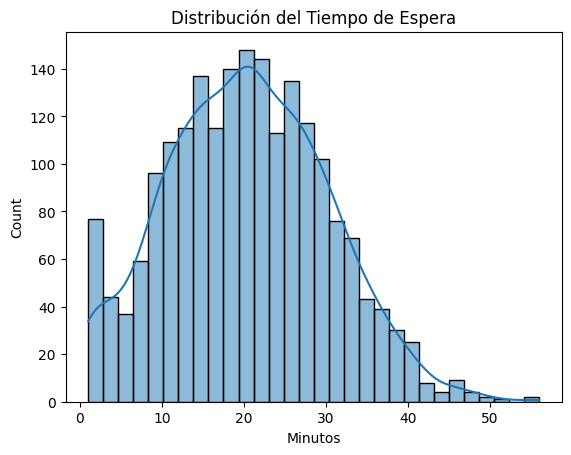

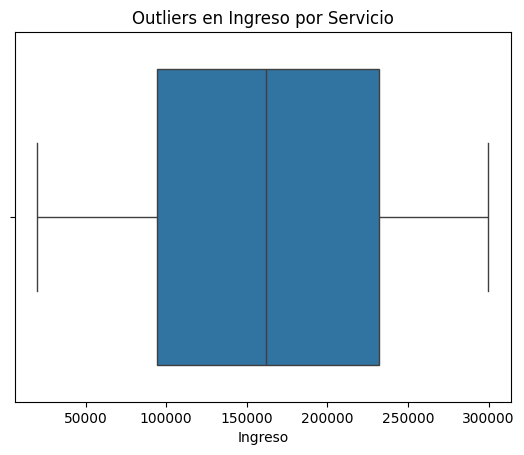

In [6]:
# Histograma de tiempo de espera
sns.histplot(df['Tiempo_Espera_Min'], bins=30, kde=True)
plt.title("Distribución del Tiempo de Espera")
plt.xlabel("Minutos")
plt.show()

# Boxplot de ingreso por servicio
sns.boxplot(x=df['Ingreso_Servicio'])
plt.title("Outliers en Ingreso por Servicio")
plt.xlabel("Ingreso")
plt.show()

Detectar y decidir.

In [7]:
#¿Cuántos valores hay mayores a 120 minutos?
df[df['Tiempo_Espera_Min']>120]

,ID_Paciente,Fecha_Atencion,Sede,Servicio,Genero,Edad,Tiempo_Espera_Min,Duracion_Consulta_Min,Ingreso_Servicio,Satisfaccion,Mes,Año


In [8]:
#¿Cuántos son y qué porcentaje del total representan?

outliers = df[df['Tiempo_Espera_Min']>120]
print(len(outliers),"registros")
print(f"{len(outliers)/len(df)*100:.2f}% del total")

0 registros
0.00% del total


Decisión

In [9]:
#Si son muy pocos (ej. menos del 1%), se pueden eliminar así
df = df[df['Tiempo_Espera_Min']<=120]

# Parte 2 – Análisis de KPIs e Insights

Objetivo
Generar indicadores clave para responder preguntas como:

¿Qué sede tiene más pacientes?

¿Cuál servicio genera más ingresos?

¿Dónde se atiende más rápido?

¿Qué sede tiene mayor satisfacción del paciente?

Paso 1. Pacientes atendidos por sede y por mes

In [10]:
pacientes_por_sede_mes = df.groupby(['Sede', 'Mes']).size().reset_index(name='Pacientes')
pacientes_por_sede_mes.head()

,Sede,Mes,Pacientes
0,Clínica Centro,April,55
1,Clínica Centro,August,73
2,Clínica Centro,December,51
3,Clínica Centro,February,44
4,Clínica Centro,January,54


Paso 2. Ingreso total y promedio por servicio

In [11]:
ingreso_por_servicio = df.groupby('Servicio')['Ingreso_Servicio'].agg(['sum', 'mean','count']).reset_index()
ingreso_por_servicio.columns = ['Servicio', 'Ingreso_Total', 'Ingreso_Promedio', 'Total_Pacientes']
ingreso_por_servicio.sort_values('Ingreso_Total', ascending=False)

,Servicio,Ingreso_Total,Ingreso_Promedio,Total_Pacientes
3,Pediatría,67851346,162323.794258,418
1,Ginecología,66017720,164223.184080,402
2,Laboratorio,65740464,162322.133333,405
0,Consulta General,63345737,164962.856771,384
4,Urgencias,62250635,159208.785166,391


Paso 3. Tiempo de espera promedio por sede y por servicio



In [12]:
espera_sede_servicio = df.groupby(["Sede", "Servicio"])['Tiempo_Espera_Min'].mean().reset_index()
espera_sede_servicio.columns =['Sede','Servicio','Tiempo_Espera_Prom']
espera_sede_servicio.sort_values('Tiempo_Espera_Prom')

,Sede,Servicio,Tiempo_Espera_Prom
7,Clínica Norte,Laboratorio,18.579976
13,Clínica Sur,Pediatría,19.011757
10,Clínica Sur,Consulta General,19.097957
8,Clínica Norte,Pediatría,19.650850
14,Clínica Sur,Urgencias,19.728154
0,Clínica Centro,Consulta General,20.153118
3,Clínica Centro,Pediatría,20.178292
6,Clínica Norte,Ginecología,20.519097
11,Clínica Sur,Ginecología,20.526610
4,Clínica Centro,Urgencias,20.546714


Paso 4: Satisfacción promedio por sede

In [13]:
satisfaccion_sede = df.groupby('Sede').agg(
    Satisfaccion_Promedio=('Satisfaccion', 'mean')
).reset_index().sort_values('Satisfaccion_Promedio', ascending=False)

satisfaccion_sede


,Sede,Satisfaccion_Promedio
0,Clínica Centro,3.727554
1,Clínica Norte,3.698140
2,Clínica Sur,3.691603


In [14]:
# Ejemplo para limpiar columnas de tiempo, ingresos y satisfacción
columnas_a_corregir = ['Tiempo_Espera_Min', 'Ingreso_Servicio', 'Satisfaccion']

for col in columnas_a_corregir:
    df[col] = pd.to_numeric(df[col], errors='coerce').round(2)


In [15]:
df.to_csv('datos_limpios_salud.csv', index=False, float_format='%.2f')


# Parte 3 – Exportación de datos procesados para Power BI

In [16]:
# 1. Dataset principal limpio
df.to_csv("datos_limpios_salud.csv", index=False)

# 2. Pacientes por sede y mes
pacientes_por_sede_mes.to_csv("kpi_pacientes_por_sede_mes.csv", index=False)

# 3. Ingreso promedio por servicio
ingreso_por_servicio.to_csv("kpi_ingreso_promedio_servicio.csv", index=False,  float_format='%.2f')

# 4. Tiempo de espera promedio por sede y servicio
espera_sede_servicio.to_csv("kpi_espera_promedio.csv", index=False, float_format='%.2f')

# 5. Satisfacción promedio por sede
satisfaccion_sede.to_csv("kpi_satisfaccion_promedio.csv", index=False , float_format='%.2f')
